In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
path = Path("D:\\MLAndDL\\FastAI\\data\\Food\\food-101")

In [5]:
path.ls()

[WindowsPath('D:/MLAndDL/FastAI/data/Food/food-101/classes.txt'),
 WindowsPath('D:/MLAndDL/FastAI/data/Food/food-101/h5'),
 WindowsPath('D:/MLAndDL/FastAI/data/Food/food-101/images'),
 WindowsPath('D:/MLAndDL/FastAI/data/Food/food-101/labels.txt'),
 WindowsPath('D:/MLAndDL/FastAI/data/Food/food-101/test.json'),
 WindowsPath('D:/MLAndDL/FastAI/data/Food/food-101/test.txt'),
 WindowsPath('D:/MLAndDL/FastAI/data/Food/food-101/train'),
 WindowsPath('D:/MLAndDL/FastAI/data/Food/food-101/train.json'),
 WindowsPath('D:/MLAndDL/FastAI/data/Food/food-101/train.txt')]

In [6]:
path_img = path/'images'
path_label = path/'labels.txt'

In [7]:
fnames = np.genfromtxt(path/'train.txt', dtype=np.str)
classes = np.genfromtxt(path/'classes.txt', dtype= np.str)

In [8]:
df = pd.DataFrame(fnames, columns = ['filename'], dtype = np.str)
df['filename'] = df['filename'] + ".jpg"
df['label'] = df['filename'].apply(lambda fname: fname.split('/')[0])

In [9]:
df.tail()

filename    label
75745  waffles/981485.jpg  waffles
75746   waffles/98238.jpg  waffles
75747  waffles/982668.jpg  waffles
75748  waffles/995085.jpg  waffles
75749  waffles/999047.jpg  waffles

# Creating DataBunch

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
np.random.seed(42)
data = ImageList.from_df(path = path_img, df = df, cols = 'filename') \
.split_by_rand_pct() \
.label_from_df(cols = 'label') \
.transform(get_transforms(), size = 224) \
.databunch() \
.normalize(imagenet_stats)

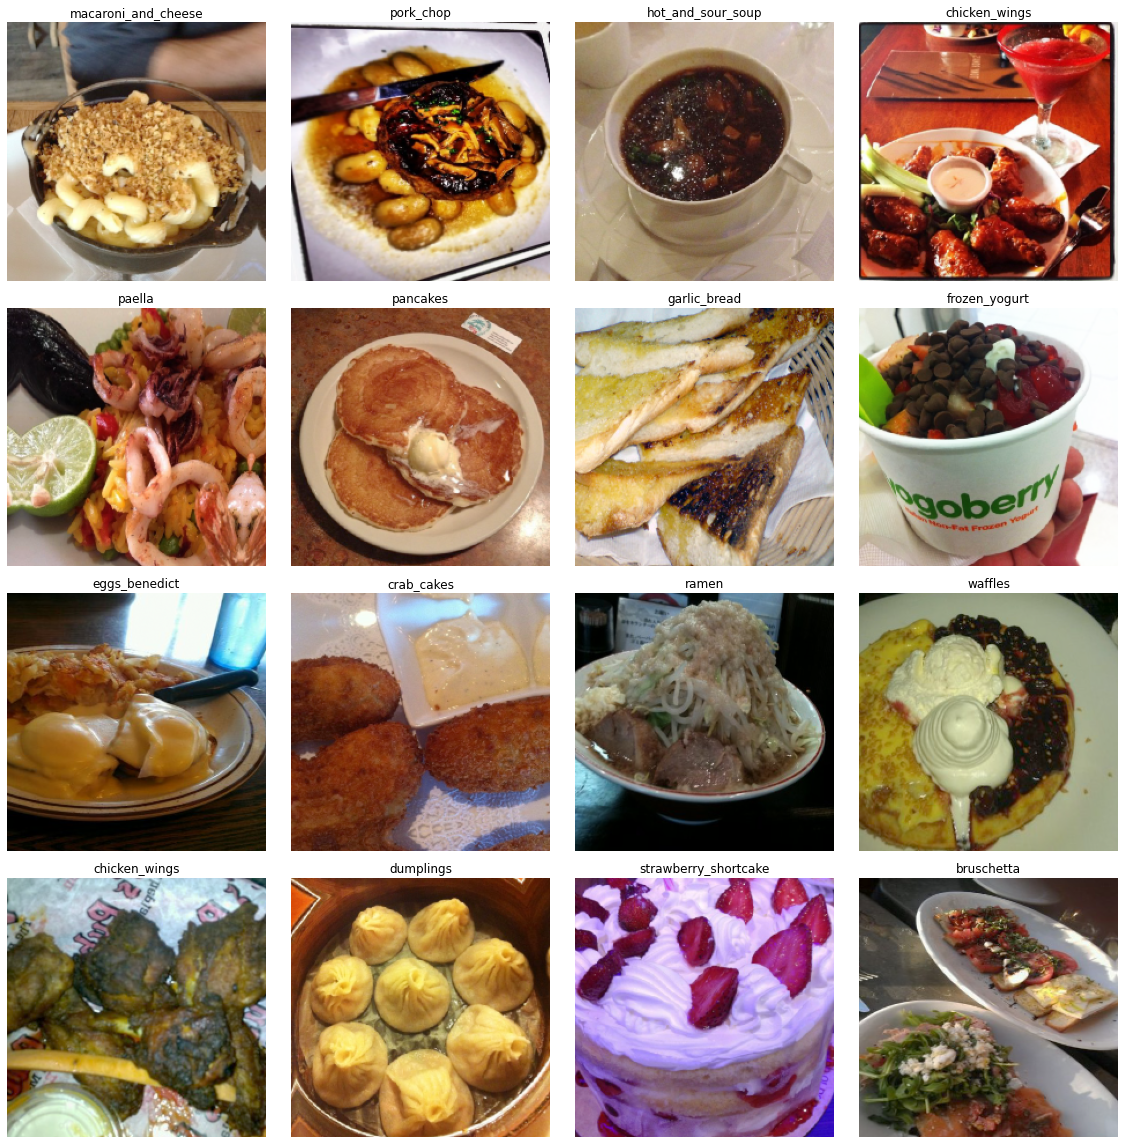

In [12]:
data.show_batch(4, fig_size = (5,7))

In [14]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [16]:
# learn.lr_find()
# learn.recorder.plot(suggestion = True)

In [ ]:
learn.fit_one_cycle(6, slice(1e-2))

In [ ]:
learn.save('food-stage1')

In [19]:
learn.load('food-stage1')

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion = True)

In [ ]:
learn.fit_one_cycle(2, max_lr = slice(1e-5, 1e-3))

In [ ]:
learn.save('food-fine-tuned')

In [ ]:
learn.load('food-fine-tuned')

In [ ]:
learn.fit_one_cycle(5, max_lr = slice(1e-5,1e-3))

In [ ]:
learn.save('food-fine-tuned_2')

In [ ]:
learn.fit_one_cycle(5, max_lr=slice(3e-6, 1e-3))

In [ ]:
learn.save('food-fine-tuned_3')

# Retraining with Increased image size - Progressive resizing

In [13]:
bs=8
data = ImageList.from_df(path = path_img, df = df, cols = 'filename') \
.split_by_rand_pct(seed = 42) \
.label_from_df(cols = 'label') \
.transform(get_transforms(), size = 512) \
.databunch(bs=bs) \
.normalize(imagenet_stats)

In [14]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [22]:
learn.load('food-fine-tuned_3')

Learner(data=ImageDataBunch;

Train: LabelList (60600 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
apple_pie,apple_pie,apple_pie,apple_pie,apple_pie
Path: D:\MLAndDL\FastAI\data\Food\food-101\images;

Valid: LabelList (15150 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
clam_chowder,macaroni_and_cheese,tacos,macaroni_and_cheese,lobster_roll_sandwich
Path: D:\MLAndDL\FastAI\data\Food\food-101\images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, ker

In [ ]:
learn.fit_one_cycle(5, max_lr = slice(3e-7, 1e-3))

In [ ]:
learn.save('food-fine-tuned-512_1')

In [ ]:
learn.fit_one_cycle(5, max_lr = slice(3e-7, 1e-3))

In [ ]:
learn.save('food-fine-tuned-512_2')

In [ ]:
learn.load('food-fine-tuned-512_2')

In [ ]:
learn.fit_one_cycle(3, max_lr = slice(6e-7,1e-3))

In [ ]:
learn.save('food-fine-tuned-512_3')

In [23]:
learn.load('food-fine-tuned-512_3')

Learner(data=ImageDataBunch;

Train: LabelList (60600 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
apple_pie,apple_pie,apple_pie,apple_pie,apple_pie
Path: D:\MLAndDL\FastAI\data\Food\food-101\images;

Valid: LabelList (15150 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
clam_chowder,macaroni_and_cheese,tacos,macaroni_and_cheese,lobster_roll_sandwich
Path: D:\MLAndDL\FastAI\data\Food\food-101\images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, ker

In [14]:
learn.fit_one_cycle(3, max_lr = slice(6e-7,1e-3))

In [15]:
learn.save('food-fine-tuned-512_4')

In [17]:
learn.fit_one_cycle(2, max_lr = slice(6e-7,1e-3))

In [18]:
learn.save('food-fine-tuned-512_5')

In [24]:
learn.load('food-fine-tuned-512_5')

Learner(data=ImageDataBunch;

Train: LabelList (60600 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
apple_pie,apple_pie,apple_pie,apple_pie,apple_pie
Path: D:\MLAndDL\FastAI\data\Food\food-101\images;

Valid: LabelList (15150 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
clam_chowder,macaroni_and_cheese,tacos,macaroni_and_cheese,lobster_roll_sandwich
Path: D:\MLAndDL\FastAI\data\Food\food-101\images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, ker

In [15]:
learn.fit_one_cycle(3, max_lr = slice(6e-7,1e-3))

In [16]:
learn.save('food-fine-tuned-512_6')

In [31]:
learn.load('food-fine-tuned-512_6')

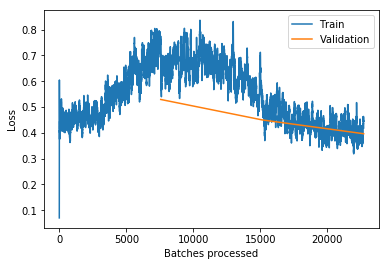

In [19]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 3.31E-05


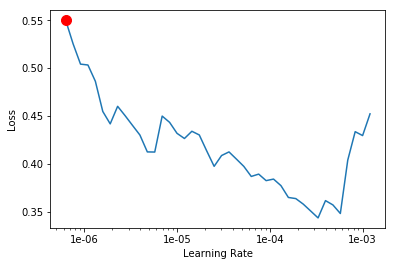

In [21]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [22]:
learn.fit_one_cycle(4, max_lr = slice(6.3e-7, 1e-3))

In [23]:
learn.save('food-fine-tuned-512_7')

In [15]:
learn.load('food-fine-tuned-512_7')

Learner(data=ImageDataBunch;

Train: LabelList (60600 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
apple_pie,apple_pie,apple_pie,apple_pie,apple_pie
Path: D:\MLAndDL\FastAI\data\Food\food-101\images;

Valid: LabelList (15150 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
clam_chowder,macaroni_and_cheese,tacos,macaroni_and_cheese,lobster_roll_sandwich
Path: D:\MLAndDL\FastAI\data\Food\food-101\images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, ker

# Interpretation

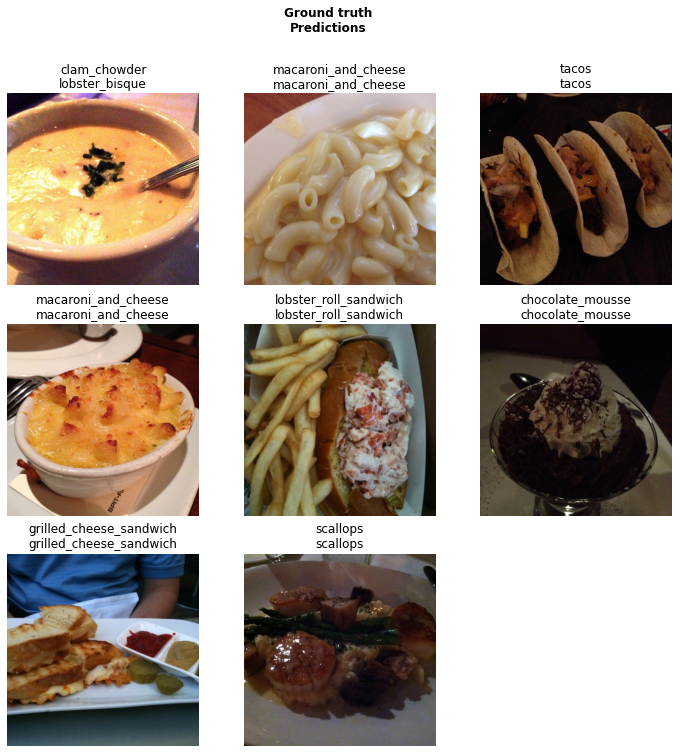

In [16]:
learn.show_results()

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

In [18]:
interp.most_confused(min_val = 5)

[('steak', 'filet_mignon', 21),
 ('filet_mignon', 'steak', 20),
 ('chocolate_cake', 'chocolate_mousse', 17),
 ('prime_rib', 'steak', 13),
 ('steak', 'prime_rib', 13),
 ('chocolate_mousse', 'chocolate_cake', 11),
 ('french_toast', 'bread_pudding', 10),
 ('ice_cream', 'frozen_yogurt', 10),
 ('pork_chop', 'baby_back_ribs', 10),
 ('sushi', 'sashimi', 10),
 ('dumplings', 'gyoza', 9),
 ('apple_pie', 'bread_pudding', 8),
 ('bread_pudding', 'apple_pie', 8),
 ('steak', 'pork_chop', 8),
 ('beef_tartare', 'tuna_tartare', 7),
 ('donuts', 'beignets', 7),
 ('ice_cream', 'chocolate_mousse', 7),
 ('lobster_bisque', 'clam_chowder', 7),
 ('panna_cotta', 'chocolate_mousse', 7),
 ('ravioli', 'lasagna', 7),
 ('beignets', 'donuts', 6),
 ('chicken_quesadilla', 'breakfast_burrito', 6),
 ('french_toast', 'pancakes', 6),
 ('strawberry_shortcake', 'cheesecake', 6),
 ('baby_back_ribs', 'pork_chop', 5),
 ('baby_back_ribs', 'steak', 5),
 ('ceviche', 'tuna_tartare', 5),
 ('chocolate_cake', 'tiramisu', 5),
 ('club_sa

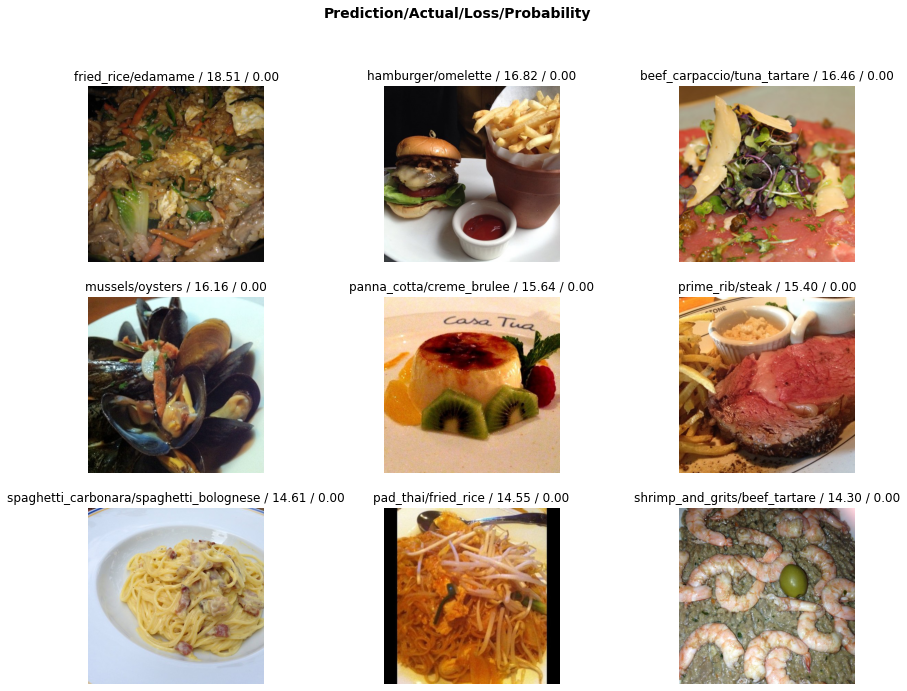

In [19]:
interp.plot_top_losses(9, figsize = (15,11))

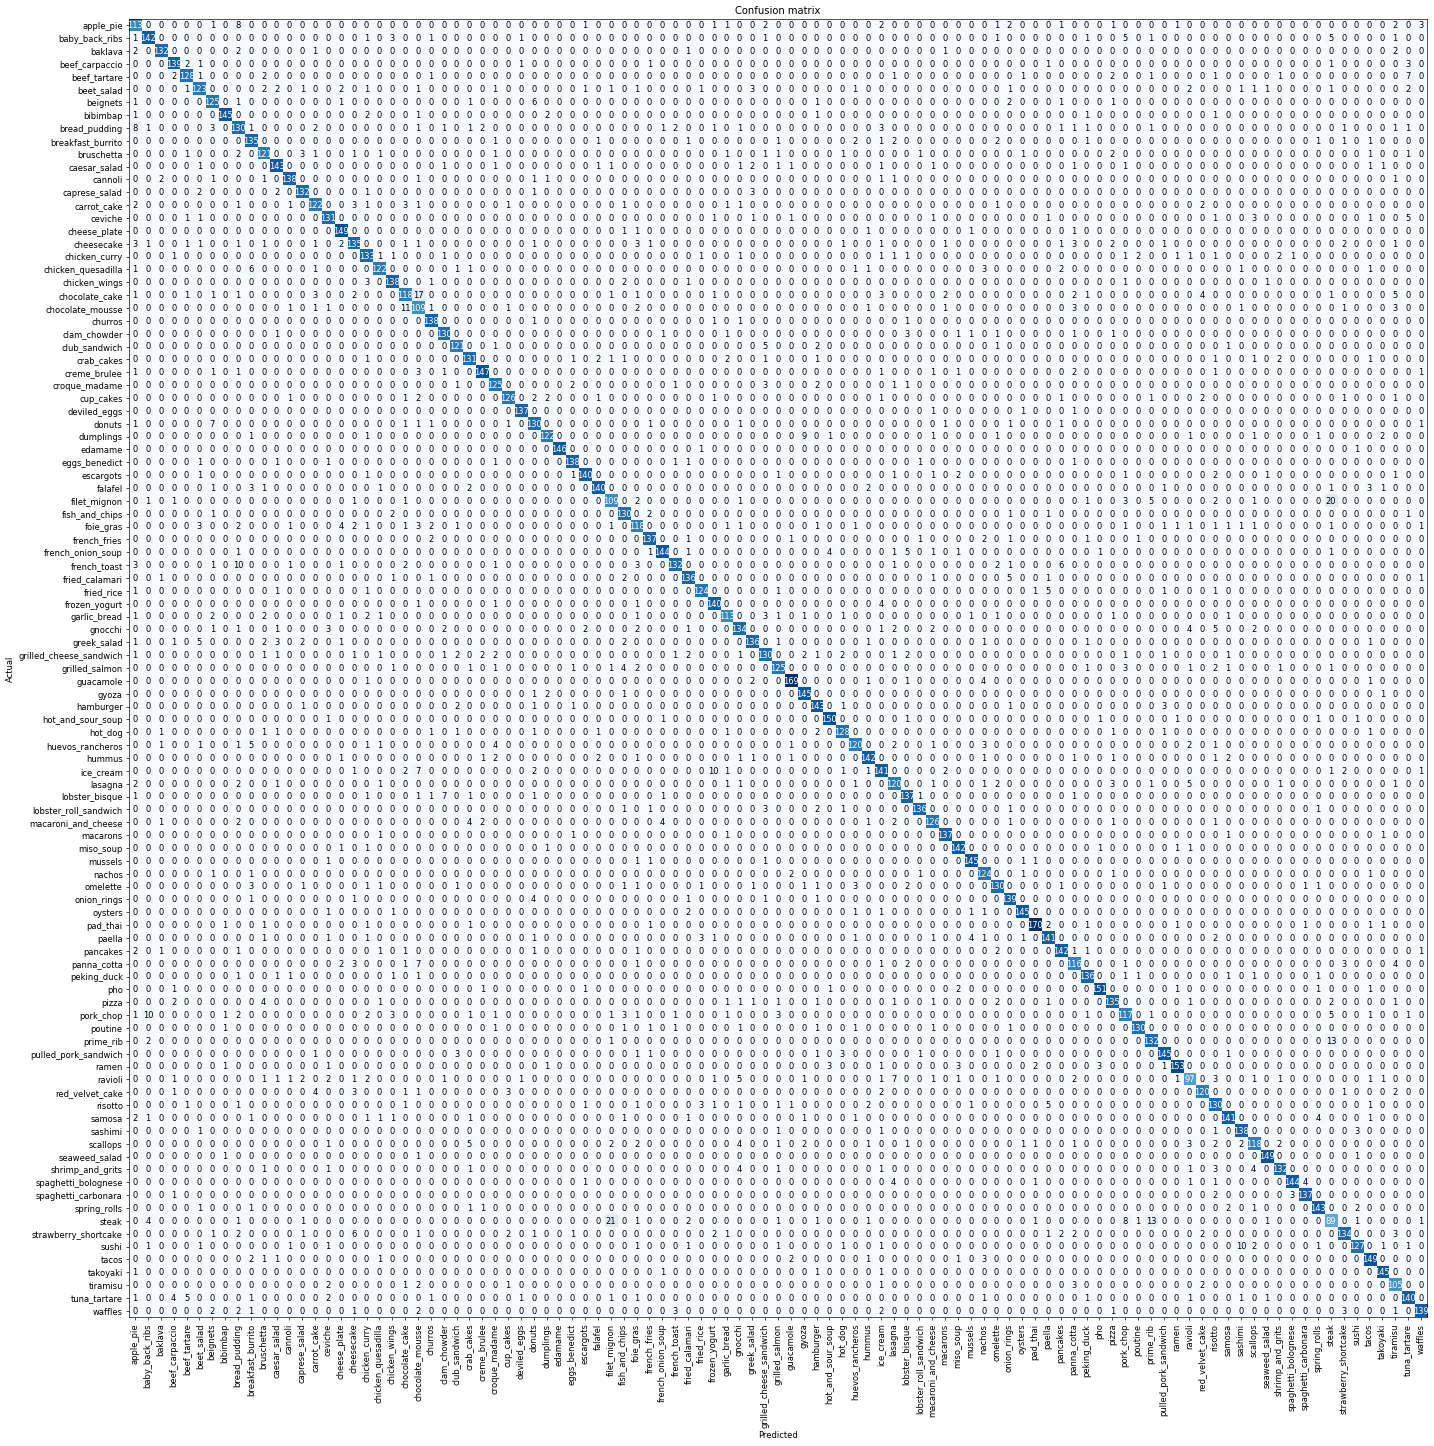

In [20]:
interp.plot_confusion_matrix(figsize = (24,24), dpi = 60)